### This file is a playground for developing some functions and checking them before putting them in the .py files

##### Develop function to get a 3d-patch around some pixel and get its class from the needle mask h5 file

In [81]:
# import all files from necessary directory
from utils.labels_utils import get_all_files_mhd
all_files_mhd = get_all_files_mhd("/data/Riabova/train/train_depth_0_70/")
len(all_files_mhd)

110

In [82]:
from utils.type_reader import mha_read_header
import numpy as np
from utils.labels_utils import get_labels
from tqdm import tqdm

# merge all images in one huge array

all_frames_filenames_array = np.empty((1))
frame_nums = np.empty((1))
labels = np.empty((1, 3))
i = 0
for f in all_files_mhd:
    if (i%20 == 0):
        print("File "+str(i)+"...")
    info = mha_read_header(f)
    labels = np.concatenate((labels, get_labels(f, info)), axis = 0)
    all_frames_filenames_array = np.concatenate((all_frames_filenames_array, [f]*info['Dimensions'][3]), axis=0)
    frame_nums = np.concatenate((frame_nums, np.arange(0, info['Dimensions'][3])), axis=0)
    i+=1
    
all_frames_filenames_array = all_frames_filenames_array[ 1:]
labels = labels[1:, :]
frame_nums = frame_nums[1:]

File 0...
File 20...
File 40...
File 60...
File 80...
File 100...


In [83]:
X = np.vstack((all_frames_filenames_array, frame_nums)).transpose()
y = labels
print(X.shape)
print(X[0, :])
print(y[0, :])

(2356, 2)
['/data/Riabova/train/train_depth_0_70/10_0_-3_0_0_0_4_2_1689851213927661.mhd'
 '0.0']
[ 99.57817325 109.4948     125.6625    ]


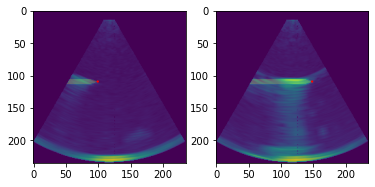

In [137]:
# plot two frames from one sequence next to each other with needle pixels and tip ground truth:

import h5py
import matplotlib.pyplot as plt
from utils.type_reader import get_image_array
from matplotlib import patches


input_image = get_image_array(X[0][0])
h5_file = h5py.File('../train/needle_masks_h5/'+X[0][0][:-4].split("/")[-1]+'.hdf5', 'r')
needle_mask = h5_file['default'][()]
h5_file.close()

frame_first = 0
frame_second = 15
label_first = labels[frame_first]
label_second = labels[frame_second]

fig = plt.figure()

ax = fig.add_subplot(1, 2, 1)
plt.imshow(input_image[:, :, int(label_first[2]), frame_first].T)
plt.imshow(needle_mask[frame_first, :, :, int(label_first[2])].T, alpha=0.2)
ax.add_patch(patches.Circle((int(label_first[0]), int(label_first[1])), radius=1, color='red'))

ax = fig.add_subplot(1, 2, 2)
plt.imshow(input_image[:, :, int(label_second[2]), frame_second].T)
plt.imshow(needle_mask[frame_second, :, :, int(label_second[2])].T, alpha=0.2)
ax.add_patch(patches.Circle((int(label_second[0]), int(label_second[1])), radius=1, color='red'))

plt.show()

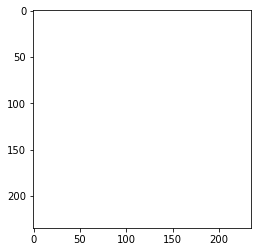

In [136]:
# create an animation from one sequence of images with needle pixels and tip ground truth and save it:
import matplotlib.animation as anm

img = [] # some array of images
frames_seq = [] # for storing the generated images

fig = plt.figure()
ax = fig.add_subplot()

for i in range(needle_mask.shape[0]):
    frames_seq.append([
        plt.imshow(input_image[:, :, int(labels[i][2]), i].T), 
        plt.imshow(needle_mask[i, :, :, int(labels[i][2])].T, alpha=0.2),
        ax.add_patch(patches.Circle((int(labels[i][0]), int(labels[i][1])), radius=1, color='red'))
])

ani = anm.ArtistAnimation(fig, frames_seq)
ani.save('needle_movement.mp4')

In [ ]:
# What happens if we subtract one consequent frame from another?